# load image data, image features, and the jsonl file. 

### 1. sort out the feature files. taking 09825.npy and 09825_info.npy as an example: 

In [ ]:
import numpy as np
a = np.load('features/feats_hm/09825.npy')
print(a, a.shape)

the output of the feature is a 100 * 2048 array. should be 100 boxes, each box is an image with 2048 pixels

In [ ]:
b = np.load('features/feats_hm/09825_info.npy', allow_pickle=True)
# print(b.item())
for i in b.item(): 
    print(i)
# print(b.item().bbox)
# print(b.item()['bbox'].shape)
# print(b.item()['num_boxes'])
# print(b.item()['objects'].shape)
# print(b.item()['cls_prob'].shape)
# print(b.item()['image_width'])
# print(b.item()['image_height'])

the _info.npy contains bbox, num_boxes, objects, cls_prob, image_width, image_height. 
bbox is a 100 * 4 array; 
objects is a 100 * 1 array; 
cls_prob is a 100 * 1600 array; 
image w and h = 512, 384 (might change over images?)



### 2. Display image and image info

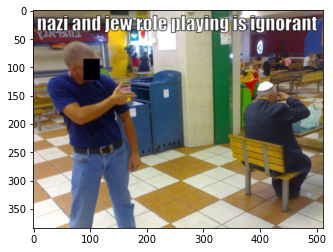

In [58]:
import matplotlib.pyplot as plt
img = plt.imread('img/09825.png')
imgplot = plt.imshow(img)
plt.show()


# Flip image

This session takes a subset of the hateful memes in training dataset, randomly pick 1500 images, and save in the img_flip subset. 

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

home = '/home/chen_zhang06/HatefulMemes/'
# get all file names in the train_jsonl: 
fnames_df = pd.read_json(os.path.join(home, "annotations/train.jsonl"), lines=True)['img']
print(fnames_df)

0       img/42953.png
1       img/23058.png
2       img/13894.png
3       img/37408.png
4       img/82403.png
            ...      
8495    img/10423.png
8496    img/98203.png
8497    img/36947.png
8498    img/16492.png
8499    img/15937.png
Name: img, Length: 8500, dtype: object


3013    img/43907.png
2717    img/02761.png
1534    img/68941.png
5386    img/79865.png
2353    img/97105.png
            ...      
299     img/17205.png
7487    img/43928.png
793     img/62458.png
8438    img/35691.png
7120    img/58473.png
Name: img, Length: 1000, dtype: object


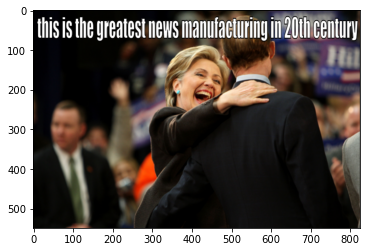

43907.png


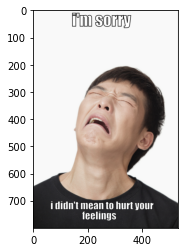

02761.png


<Figure size 432x288 with 0 Axes>

In [10]:
img_dir = '/home/chen_zhang06/.cache/torch/mmf/data/datasets/hateful_memes/defaults/images/'

# randomly select 1000 fnames: 
fnames_df = pd.read_json(os.path.join(home, "annotations/train.jsonl"), lines=True)['img']
# print(fnames)

import random
selected_df = fnames_df.sample(n = 1000, random_state = 1) # seed random seed
print(selected_df)

# before flipping: 
os.chdir(os.path.join(home, 'output'))
for i in selected_df[0:2]: 
    img = plt.imread(os.path.join(img_dir, i))
    imgplot = plt.imshow(img)
    outname = i.split('/')[1]
    plt.show()
    print(outname)
    plt.savefig(outname)

In [12]:
# apply flipping:
import cv2
for i in selected_df: 
    img = cv2.imread(os.path.join(img_dir, i))
    img_flip = cv2.flip(img, 1)
#     print(i.split('/'))
#     new_fname = i.split('/')[0] + '/' + 'flip_' + i.split('/')[1]
    new_fname = 'flip_' + i.split('/')[1]
#     print(new_fname)
    cv2.imwrite(os.path.join('/home/chen_zhang06/HatefulMemes/img_flip/', new_fname), img_flip)

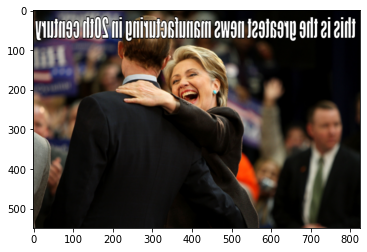

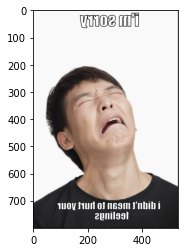

<Figure size 432x288 with 0 Axes>

In [13]:
# after flipping: 
os.chdir(os.path.join(home, 'output'))
for i in selected_df[0:2]: 
    new_fname = 'flip_' + i.split('/')[1]
    img = plt.imread(os.path.join('/home/chen_zhang06/HatefulMemes/img_flip/', new_fname))
    imgplot = plt.imshow(img)
    plt.show()
    plt.savefig(new_fname)
#     print(new_fname)

In [14]:
# generate jsonl file: 
df = pd.read_json(os.path.join(home, "annotations/train.jsonl"), lines=True)
# print(df)
extracted = df[df['img'].isin(selected_df.values)]
print(extracted)

         id            img  label  \
21    70146  img/70146.png      0   
39    95812  img/95812.png      0   
45     4876  img/04876.png      0   
67    81059  img/81059.png      0   
74    12894  img/12894.png      0   
...     ...            ...    ...   
8457  83427  img/83427.png      1   
8459  56891  img/56891.png      1   
8467  61502  img/61502.png      1   
8480   3591  img/03591.png      1   
8483   3764  img/03764.png      1   

                                                   text  
21    lets erect a memorial to all the americans mur...  
39                  happy shot in the face day 5-2-2011  
45                                                 goin  
67                i like my refugees like this '' '' ''  
74    imagine, if you will an entire country so igno...  
...                                                 ...  
8457  if i had $10 for every gender only got $20 in ...  
8459  i don't always go to black peoples garage sale...  
8467  when you raid area 51 to fi

In [15]:
# adjust ID
extracted["id"] = extracted["id"].astype(int) + 200_000
print(extracted)

          id            img  label  \
21    270146  img/70146.png      0   
39    295812  img/95812.png      0   
45    204876  img/04876.png      0   
67    281059  img/81059.png      0   
74    212894  img/12894.png      0   
...      ...            ...    ...   
8457  283427  img/83427.png      1   
8459  256891  img/56891.png      1   
8467  261502  img/61502.png      1   
8480  203591  img/03591.png      1   
8483  203764  img/03764.png      1   

                                                   text  
21    lets erect a memorial to all the americans mur...  
39                  happy shot in the face day 5-2-2011  
45                                                 goin  
67                i like my refugees like this '' '' ''  
74    imagine, if you will an entire country so igno...  
...                                                 ...  
8457  if i had $10 for every gender only got $20 in ...  
8459  i don't always go to black peoples garage sale...  
8467  when you raid a

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
# adjust img name: 
# extracted = df[df['img'].isin(selected_df.values)]
extracted["img"] = extracted['img'].str.split('/').str.get(0) + '/flip_' + extracted['img'].str.split('/').str.get(1)
print(extracted)

          id                 img  label  \
21    270146  img/flip_70146.png      0   
39    295812  img/flip_95812.png      0   
45    204876  img/flip_04876.png      0   
67    281059  img/flip_81059.png      0   
74    212894  img/flip_12894.png      0   
...      ...                 ...    ...   
8457  283427  img/flip_83427.png      1   
8459  256891  img/flip_56891.png      1   
8467  261502  img/flip_61502.png      1   
8480  203591  img/flip_03591.png      1   
8483  203764  img/flip_03764.png      1   

                                                   text  
21    lets erect a memorial to all the americans mur...  
39                  happy shot in the face day 5-2-2011  
45                                                 goin  
67                i like my refugees like this '' '' ''  
74    imagine, if you will an entire country so igno...  
...                                                 ...  
8457  if i had $10 for every gender only got $20 in ...  
8459  i don't alway

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [60]:
# save the file
data = extracted.to_json(orient='records', lines=True)
with open(os.path.join(home, "annotations/flip_img.jsonl"), "w", encoding='utf-8') as f:
    f.write(data)

# Blur images from flipped

In [17]:
# load the jsonl file and images
import pandas as pd
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
home = '/home/chen_zhang06/HatefulMemes/'
blur_df = pd.read_json(os.path.join(home, "annotations/flip_img.jsonl"), lines=True)
print(blur_df)

         id                 img  label  \
0    270146  img/flip_70146.png      0   
1    295812  img/flip_95812.png      0   
2    204876  img/flip_04876.png      0   
3    281059  img/flip_81059.png      0   
4    212894  img/flip_12894.png      0   
..      ...                 ...    ...   
995  283427  img/flip_83427.png      1   
996  256891  img/flip_56891.png      1   
997  261502  img/flip_61502.png      1   
998  203591  img/flip_03591.png      1   
999  203764  img/flip_03764.png      1   

                                                  text  
0    lets erect a memorial to all the americans mur...  
1                  happy shot in the face day 5-2-2011  
2                                                 goin  
3                i like my refugees like this '' '' ''  
4    imagine, if you will an entire country so igno...  
..                                                 ...  
995  if i had $10 for every gender only got $20 in ...  
996  i don't always go to black peoples

In [18]:
# blur image and save
# img_dir = '/home/chen_zhang06/.cache/torch/mmf/data/datasets/hateful_memes/defaults/images/'
img_dir = '/home/chen_zhang06/HatefulMemes/img_flip/'
for i in blur_df['img']: 
    fname = i.split('/')[1]
#     print(fname)
    img = cv2.imread(os.path.join(img_dir, fname))
    img_blur = cv2.GaussianBlur(img,(21,21),cv2.BORDER_DEFAULT)
#     print(i.split('/')[0])
#     new_fname = i.split('/')[0] + '/' + 'flipblur_' + i.split('/')[1]
    new_fname = fname.split('_')[0] + 'blur_' + fname.split('_')[1]
#     print(new_fname)
    cv2.imwrite(os.path.join('/home/chen_zhang06/HatefulMemes/img_flipblur/', new_fname), img_blur)

In [2]:
# display blurred image\
print(blur_df)
# for i in blur_df[0:2]: 
#     new_fname = 'flipblur_' + i.split('/')[1]
#     img = plt.imread(os.path.join('/home/chen_zhang06/HatefulMemes/img_flip/', new_fname))
#     imgplot = plt.imshow(img)
#     plt.show()

NameError: name 'blur_df' is not defined

In [22]:
# generate a new jsonl file
# rename img
blur_df["img"] = blur_df['img'].str.split('/').str.get(0) + '/flipblur_' + blur_df['img'].str.split('_').str.get(1)
print(blur_df)

         id                     img  label  \
0    270146  img/flipblur_70146.png      0   
1    295812  img/flipblur_95812.png      0   
2    204876  img/flipblur_04876.png      0   
3    281059  img/flipblur_81059.png      0   
4    212894  img/flipblur_12894.png      0   
..      ...                     ...    ...   
995  283427  img/flipblur_83427.png      1   
996  256891  img/flipblur_56891.png      1   
997  261502  img/flipblur_61502.png      1   
998  203591  img/flipblur_03591.png      1   
999  203764  img/flipblur_03764.png      1   

                                                  text  
0    lets erect a memorial to all the americans mur...  
1                  happy shot in the face day 5-2-2011  
2                                                 goin  
3                i like my refugees like this '' '' ''  
4    imagine, if you will an entire country so igno...  
..                                                 ...  
995  if i had $10 for every gender only got $20 

In [23]:
# update id
blur_df["id"] = blur_df["id"].astype(int) + 100_000
print(blur_df)

         id                     img  label  \
0    370146  img/flipblur_70146.png      0   
1    395812  img/flipblur_95812.png      0   
2    304876  img/flipblur_04876.png      0   
3    381059  img/flipblur_81059.png      0   
4    312894  img/flipblur_12894.png      0   
..      ...                     ...    ...   
995  383427  img/flipblur_83427.png      1   
996  356891  img/flipblur_56891.png      1   
997  361502  img/flipblur_61502.png      1   
998  303591  img/flipblur_03591.png      1   
999  303764  img/flipblur_03764.png      1   

                                                  text  
0    lets erect a memorial to all the americans mur...  
1                  happy shot in the face day 5-2-2011  
2                                                 goin  
3                i like my refugees like this '' '' ''  
4    imagine, if you will an entire country so igno...  
..                                                 ...  
995  if i had $10 for every gender only got $20 

In [24]:
# save jsonl file
data = blur_df.to_json(orient='records', lines=True)
with open(os.path.join(home, "annotations/flipblur_img.jsonl"), "w", encoding='utf-8') as f:
    f.write(data)

# Extract features of flipped and blurred image

In [1]:
import os
home = "/home/chen_zhang06/HatefulMemes"
os.chdir(os.path.join(home, "mmf/tools/scripts/features/"))
out_folder = os.path.join(home, "features_flipblur/")

!python extract_features_vmb.py --config_file "https://dl.fbaipublicfiles.com/pythia/detectron_model/detectron_model_x152.yaml" \
                                --model_name "X-152" \
                                --output_folder $out_folder \
                                --image_dir "/home/chen_zhang06/HatefulMemes/img_flipblur" \
                                --num_features 100 \
                                # --exclude_list "/content/exclude.txt"
                                # --feature_name "fc6" \
                                # --confidence_threshold 0. \

model and config file exists in directory: /home/chen_zhang06/HatefulMemes/mmf/tools/scripts/features
image directory: /home/chen_zhang06/HatefulMemes/img_flipblur
/home/chen_zhang06/HatefulMemes/vqa-maskrcnn-benchmark/maskrcnn_benchmark/structures/boxlist_ops.py:45: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:766.)
  keep = ((ws >= min_size) & (hs >= min_size)).nonzero().squeeze(1)
Processed 200/1000
Processed 400/1000
Processed 600/1000
Processed 800/1000
Processed 1000/1000


# Concat jsonl files

In [12]:
import pandas as pd
import os

# Get annotations
home = './'
# blur_df = pd.read_json(os.path.join(home, "annotations/flip_img.jsonl"), lines=True)
# print(blur_df)

flipblur = pd.read_json(os.path.join(home, "annotations/flipblur_img.jsonl"), lines=True)
train = pd.read_json(os.path.join(home, "annotations/train.jsonl"), lines=True)
# print(train)
# print(flipblur)

# Add memotion data to 'train.jsonl'
train = pd.concat([train, flipblur], axis=0)

# Shuffle data
train = train.sample(frac=1).reset_index(drop=True)
print(train)
# # Write new jsonl file
train_json = train.to_json(orient='records', lines=True)

with open(os.path.join(home, "annotations/train_v1.jsonl"), "w", encoding='utf-8') as f:
    f.write(train_json)

         id            img  label  \
0     37419  img/37419.png      0   
1     43782  img/43782.png      0   
2     31495  img/31495.png      0   
3     65098  img/65098.png      0   
4     56482  img/56482.png      1   
...     ...            ...    ...   
9495  56930  img/56930.png      1   
9496  21450  img/21450.png      1   
9497  81203  img/81203.png      1   
9498  75984  img/75984.png      0   
9499  76953  img/76953.png      0   

                                                   text  
0         when the turbulence in the plane gets intense  
1                 what happened in auschwitz is inhuman  
2                     walking into a smokers house like  
3      and you think confederate statues are offensive?  
4     heroin is destroying the white community keep ...  
...                                                 ...  
9495  dis one time at concentration camp i got such ...  
9496  interviewer: can you demonstrate your problem ...  
9497                 holy fuck 50

# use the memotion data, and add all 7k images

the goal is to convert 7k dataset. 

In [1]:
# first need to remove crashed image... 


In [ ]:
# run the label_memotion_mod.py
os.chdir(home)
!python label_memotion_mod.py --home ./
# image stored at /memotion_dataset_7k/images/, jsonl file stored at /annotations/label_memotion.jsonl
# run the _mod file twice, first with label = 1, naming as hateful; second time with label = 0, naming nonhateful

note that 5110 non hateful images were transferred to memontion_dataset_7k/images_nonhateful; 
1350 non hateful images were transferred to memontion_dataset_7k/images_nonhateful; 